### Pobieranie zbioru i pakietów

In [1]:
%pip install kaggle
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn

     ---------------------------------------- 84.6/84.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111955 sha256=23592736409344e3027e92f5ac103680cd5efb348835a123a68118e729e02b66
  Stored in directory: c:\users\adamw\appdata\local\pip\cache\wheels\54\6e\ff\d5ab6af2287a2d0c5b8cea9328fb14940ca253fe60214a99c8
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!kaggle datasets download -d thedevastator/1-5-million-beer-reviews-from-beer-advocate


  0%|          | 0.00/32.5M [00:00<?, ?B/s]
  3%|3         | 1.00M/32.5M [00:00<00:21, 1.53MB/s]
  6%|6         | 2.00M/32.5M [00:00<00:11, 2.78MB/s]
  9%|9         | 3.00M/32.5M [00:00<00:07, 3.87MB/s]
 12%|#2        | 4.00M/32.5M [00:01<00:06, 4.72MB/s]
 15%|#5        | 5.00M/32.5M [00:01<00:05, 5.20MB/s]
 18%|#8        | 6.00M/32.5M [00:01<00:05, 5.08MB/s]
 22%|##1       | 7.00M/32.5M [00:01<00:05, 5.19MB/s]
 25%|##4       | 8.00M/32.5M [00:01<00:04, 5.21MB/s]
 28%|##7       | 9.00M/32.5M [00:02<00:04, 5.12MB/s]
 31%|###       | 10.0M/32.5M [00:02<00:04, 5.25MB/s]
 34%|###3      | 11.0M/32.5M [00:02<00:04, 5.50MB/s]
 37%|###6      | 12.0M/32.5M [00:02<00:03, 6.10MB/s]
 40%|####      | 13.0M/32.5M [00:02<00:03, 6.57MB/s]
 43%|####3     | 14.0M/32.5M [00:02<00:03, 6.39MB/s]
 46%|####6     | 15.0M/32.5M [00:03<00:03, 6.10MB/s]
 49%|####9     | 16.0M/32.5M [00:03<00:02, 5.83MB/s]
 52%|#####2    | 17.0M/32.5M [00:03<00:02, 5.85MB/s]
 55%|#####5    | 18.0M/32.5M [00:03<00:02, 5.87MB/s]
 

In [ ]:
!kaggle datasets download -d

In [ ]:
!unzip -o 1-5-million-beer-reviews-from-beer-advocate.zip

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.set_option('float_format', '{:f}'.format)

## Wczytywanie danych

In [8]:
beers=pd.read_csv('beer_reviews.csv')

beers.head()

index  brewery_id             brewery_name  review_time  review_overall  \
0      0       10325          Vecchio Birraio   1234817823        1.500000   
1      1       10325          Vecchio Birraio   1235915097        3.000000   
2      2       10325          Vecchio Birraio   1235916604        3.000000   
3      3       10325          Vecchio Birraio   1234725145        3.000000   
4      4        1075  Caldera Brewing Company   1293735206        4.000000   

   review_aroma  review_appearance review_profilename  \
0      2.000000           2.500000            stcules   
1      2.500000           3.000000            stcules   
2      2.500000           3.000000            stcules   
3      3.000000           3.500000            stcules   
4      4.500000           4.000000     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen       1.500000      1.500000   
1              English Strong Ale       3.000000      3.000000   
2          Foreign / Export Stout       3.000000      3.000000   
3                 German Pilsener       2.500000      3.000000   
4  American Double / Imperial IPA       4.000000      4.500000   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen  5.000000        47986  
1                Red Moon  6.200000        48213  
2  Black Horse Black Beer  6.500000        48215  
3              Sausa Pils  5.000000        47969  
4           Cauldron DIPA  7.700000        64883

In [9]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


### Czyszczenie 

In [49]:
beers.dropna(subset=['brewery_name'], inplace=True)
beers.dropna(subset=['review_profilename'], inplace=True)
beers.dropna(subset=['beer_abv'], inplace=True)

beers.isnull().sum()

index                 0
brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

### Normalizacja

In [22]:
scaler = MinMaxScaler()

beers[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']] = scaler.fit_transform(beers[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']])

### Podział na podzbiory

In [24]:
beers_train, beers_dev_test = train_test_split(beers, test_size=0.2, random_state=1234)
beers_dev, beers_test = train_test_split(beers_dev_test, test_size=0.5, random_state=1234)

In [25]:
print(f"Liczba kolumn w każdym zbiorze: {beers.shape[1]} kolumn")
print(f"Całość: {beers.shape[0]} rekordów ")
print(f"Train: {beers_train.shape[0]} rekordów")
print(f"Dev: {beers_dev.shape[0]} rekordów")
print(f"Test: {beers_test.shape[0]} rekordów")

Liczba kolumn w każdym zbiorze: 14 kolumn
Całość: 1518478 rekordów 
Train: 1214782 rekordów
Dev: 151848 rekordów
Test: 151848 rekordów


### Przegląd danych

In [51]:
print(f"Suma różnych piw: {beers['beer_name'].nunique()}")
print(f"Suma różnych styli: {beers['beer_style'].nunique()}")
print(f"Suma różnych browarów: {beers['brewery_name'].nunique()}")

Suma różnych piw: 44075
Suma różnych styli: 104
Suma różnych browarów: 5155


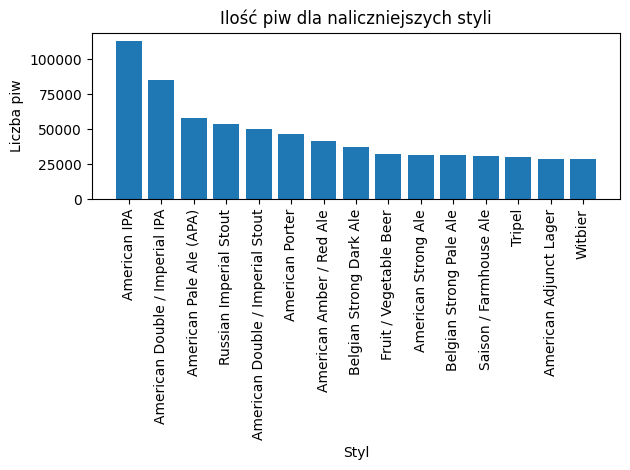

In [76]:
style_counts = beers['beer_style'].value_counts()

top_15_styles = style_counts.head(15) 

plt.bar(top_15_styles.index, top_15_styles.values)
plt.xlabel('Styl')
plt.ylabel('Liczba piw')
plt.title('Ilość piw dla naliczniejszych styli')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [91]:
reviews = pd.DataFrame(beers.groupby('beer_name')['review_overall'].mean())
reviews['Liczba opini'] = pd.DataFrame(beers.groupby('beer_name')['review_overall'].count())
reviews = reviews.sort_values(by=['Liczba opini'], ascending=False)
reviews.head()

review_overall  Liczba opini
beer_name                                                        
90 Minute IPA                              0.829097          3289
Old Rasputin Russian Imperial Stout        0.834823          3110
Sierra Nevada Celebration Ale              0.833711          2999
India Pale Ale                             0.770777          2960
Two Hearted Ale                            0.866043          2727

In [32]:
beers[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']].describe().applymap(lambda x: f"{x:0.3f}")

review_overall review_aroma review_appearance review_palate  \
count    1518478.000  1518478.000       1518478.000   1518478.000   
mean           0.765        0.687             0.770         0.688   
std            0.143        0.174             0.123         0.170   
min            0.000        0.000             0.000         0.000   
25%            0.700        0.625             0.700         0.625   
50%            0.800        0.750             0.800         0.750   
75%            0.900        0.750             0.800         0.750   
max            1.000        1.000             1.000         1.000   

      review_taste     beer_abv  beer_beerid  
count  1518478.000  1518478.000  1518478.000  
mean         0.701        0.122        0.277  
std          0.182        0.040        0.282  
min          0.000        0.000        0.000  
25%          0.625        0.090        0.021  
50%          0.750        0.112        0.166  
75%          0.875        0.147        0.507  
max          1.000        1.000        1.000

In [33]:
beers_train[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']].describe().applymap(lambda x: f"{x:0.1f}")

review_overall review_aroma review_appearance review_palate  \
count      1214782.0    1214782.0         1214782.0     1214782.0   
mean             0.8          0.7               0.8           0.7   
std              0.1          0.2               0.1           0.2   
min              0.0          0.0               0.0           0.0   
25%              0.7          0.6               0.7           0.6   
50%              0.8          0.8               0.8           0.8   
75%              0.9          0.8               0.8           0.8   
max              1.0          1.0               1.0           1.0   

      review_taste   beer_abv beer_beerid  
count    1214782.0  1214782.0   1214782.0  
mean           0.7        0.1         0.3  
std            0.2        0.0         0.3  
min            0.0        0.0         0.0  
25%            0.6        0.1         0.0  
50%            0.8        0.1         0.2  
75%            0.9        0.1         0.5  
max            1.0        1.0         1.0

In [34]:
beers_dev[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']].describe().applymap(lambda x: f"{x:0.1f}")

review_overall review_aroma review_appearance review_palate  \
count       151848.0     151848.0          151848.0      151848.0   
mean             0.8          0.7               0.8           0.7   
std              0.1          0.2               0.1           0.2   
min              0.0          0.0               0.0           0.0   
25%              0.7          0.6               0.7           0.6   
50%              0.8          0.8               0.8           0.8   
75%              0.9          0.8               0.8           0.8   
max              1.0          1.0               1.0           1.0   

      review_taste  beer_abv beer_beerid  
count     151848.0  151848.0    151848.0  
mean           0.7       0.1         0.3  
std            0.2       0.0         0.3  
min            0.0       0.0         0.0  
25%            0.6       0.1         0.0  
50%            0.8       0.1         0.2  
75%            0.9       0.1         0.5  
max            1.0       0.7         1.0

In [35]:
beers_test[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv', 'beer_beerid']].describe().applymap(lambda x: f"{x:0.1f}")

review_overall review_aroma review_appearance review_palate  \
count       151848.0     151848.0          151848.0      151848.0   
mean             0.8          0.7               0.8           0.7   
std              0.1          0.2               0.1           0.2   
min              0.0          0.0               0.0           0.0   
25%              0.7          0.6               0.7           0.6   
50%              0.8          0.8               0.8           0.8   
75%              0.9          0.8               0.8           0.8   
max              1.0          1.0               1.0           1.0   

      review_taste  beer_abv beer_beerid  
count     151848.0  151848.0    151848.0  
mean           0.7       0.1         0.3  
std            0.2       0.0         0.3  
min            0.0       0.0         0.0  
25%            0.6       0.1         0.0  
50%            0.8       0.1         0.2  
75%            0.9       0.1         0.5  
max            1.0       0.7         1.0